In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pickle


In [34]:
Travel_df= pd.read_csv('C://Users//Akhila Potla//OneDrive//Desktop/project//TravelInsurancePrediction.csv')
Travel_df

Unnamed: 0  Age               Employment Type GraduateOrNot  \
0              0   31             Government Sector           Yes   
1              1   31  Private Sector/Self Employed           Yes   
2              2   34  Private Sector/Self Employed           Yes   
3              3   28  Private Sector/Self Employed           Yes   
4              4   28  Private Sector/Self Employed           Yes   
...          ...  ...                           ...           ...   
1982        1982   33  Private Sector/Self Employed           Yes   
1983        1983   28  Private Sector/Self Employed           Yes   
1984        1984   28  Private Sector/Self Employed           Yes   
1985        1985   34  Private Sector/Self Employed           Yes   
1986        1986   34  Private Sector/Self Employed           Yes   

      AnnualIncome  FamilyMembers  ChronicDiseases FrequentFlyer  \
0           400000              6                1            No   
1          1250000              7                0            No   
2           500000              4                1            No   
3           700000              3                1            No   
4           700000              8                1           Yes   
...            ...            ...              ...           ...   
1982       1500000              4                0           Yes   
1983       1750000              5                1            No   
1984       1150000              6                1            No   
1985       1000000              6                0           Yes   
1986        500000              4                0            No   

     EverTravelledAbroad  TravelInsurance  
0                     No                0  
1                     No                0  
2                     No                1  
3                     No                0  
4                     No                0  
...                  ...              ...  
1982                 Yes                1  
1983                 Yes                0  
1984                  No                0  
1985                 Yes                1  
1986                  No                0  

[1987 rows x 10 columns]

In [35]:
Travel_df.shape

(1987, 10)

In [36]:
Travel_df['Employment Type'] = Travel_df['Employment Type'].map({'Government Sector':1,'Private Sector/Self Employed':2})
Travel_df['GraduateOrNot'] = Travel_df['GraduateOrNot'].map({'Yes':1,'No':0})
Travel_df['FrequentFlyer'] = Travel_df['FrequentFlyer'].map({'Yes':1,'No':0})
Travel_df['EverTravelledAbroad'] = Travel_df['EverTravelledAbroad'].map({'Yes':1,'No':0})

In [37]:
Travel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Unnamed: 0           1987 non-null   int64
 1   Age                  1987 non-null   int64
 2   Employment Type      1987 non-null   int64
 3   GraduateOrNot        1987 non-null   int64
 4   AnnualIncome         1987 non-null   int64
 5   FamilyMembers        1987 non-null   int64
 6   ChronicDiseases      1987 non-null   int64
 7   FrequentFlyer        1987 non-null   int64
 8   EverTravelledAbroad  1987 non-null   int64
 9   TravelInsurance      1987 non-null   int64
dtypes: int64(10)
memory usage: 155.4 KB


In [38]:
Travel_df.isnull().sum()

Unnamed: 0             0
Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

In [39]:
cats=[]
nums=[]
for i in Travel_df.columns:
    if i =='Employment Type' or i =='GraduateOrNot':
        cats.append(i)
    elif i =='Age' or i =='AnnualIncome' or i =='FamilyMembers':
        nums.append(i)
print('cats=',cats)
print('nums=',nums)


cats= ['Employment Type', 'GraduateOrNot']
nums= ['Age', 'AnnualIncome', 'FamilyMembers']


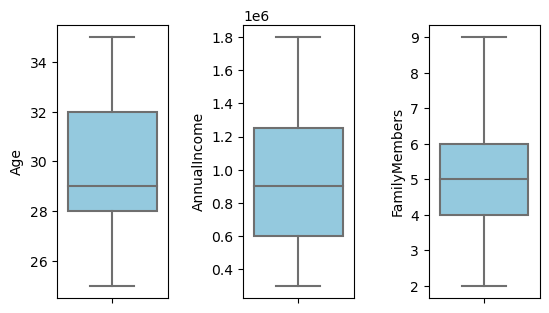

In [40]:
plt.figure(figsize=(20,12))
for i in range(0, len(nums)) :
    plt.subplot(4,11, i+2)
    sns.boxplot (y=Travel_df [nums[i]], color='skyblue', orient='v')
plt.tight_layout ()

In [41]:
print(len(nums))
print(len(cats))

3
2


In [42]:
Travel_df.describe()

Unnamed: 0          Age  Employment Type  GraduateOrNot  AnnualIncome  \
count  1987.000000  1987.000000      1987.000000    1987.000000  1.987000e+03   
mean    993.000000    29.650226         1.713135       0.851535  9.327630e+05   
std     573.741812     2.913308         0.452412       0.355650  3.768557e+05   
min       0.000000    25.000000         1.000000       0.000000  3.000000e+05   
25%     496.500000    28.000000         1.000000       1.000000  6.000000e+05   
50%     993.000000    29.000000         2.000000       1.000000  9.000000e+05   
75%    1489.500000    32.000000         2.000000       1.000000  1.250000e+06   
max    1986.000000    35.000000         2.000000       1.000000  1.800000e+06   

       FamilyMembers  ChronicDiseases  FrequentFlyer  EverTravelledAbroad  \
count    1987.000000      1987.000000    1987.000000          1987.000000   
mean        4.752894         0.277806       0.209864             0.191243   
std         1.609650         0.448030       0.407314             0.393379   
min         2.000000         0.000000       0.000000             0.000000   
25%         4.000000         0.000000       0.000000             0.000000   
50%         5.000000         0.000000       0.000000             0.000000   
75%         6.000000         1.000000       0.000000             0.000000   
max         9.000000         1.000000       1.000000             1.000000   

       TravelInsurance  
count      1987.000000  
mean          0.357323  
std           0.479332  
min           0.000000  
25%           0.000000  
50%           0.000000  
75%           1.000000  
max           1.000000

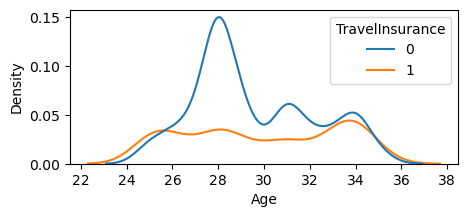

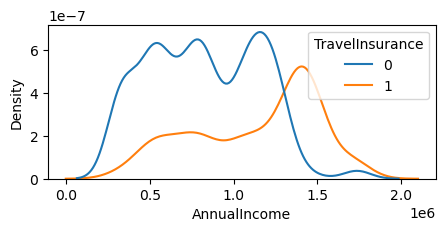

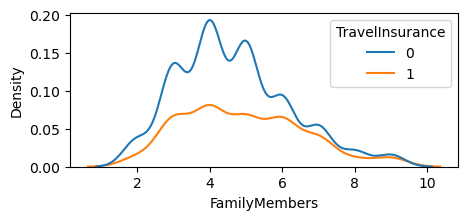

In [43]:
for feature in nums:
    fig,ax=plt.subplots(figsize=(5,2))
    sns.kdeplot(data=Travel_df,hue='TravelInsurance',x=feature,ax=ax)
plt.show()

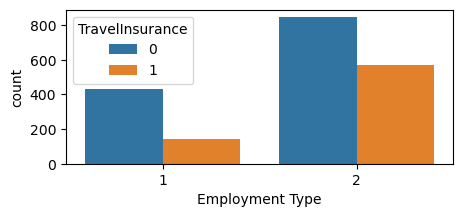

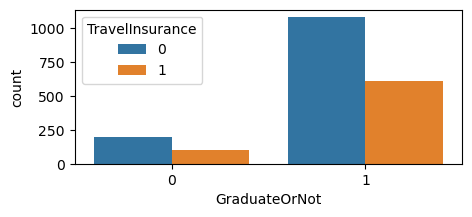

In [44]:
target = 'TravelInsurance' 
for feature in cats:
    fig, ax = plt.subplots(figsize=(5,2))
    sns.countplot(x=feature, hue=target, data=Travel_df, ax=ax)
    plt.show()

<Axes: xlabel='TravelInsurance', ylabel='count'>

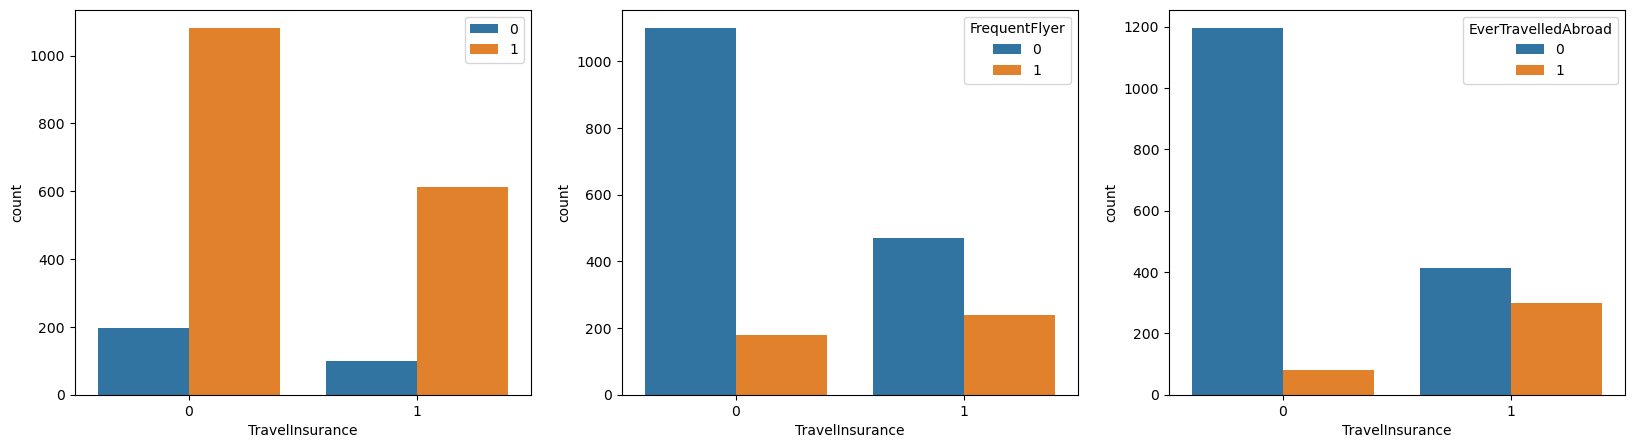

In [45]:
plt.figure(figsize=(20,5))
plt.subplot(131)
sns.countplot(x=Travel_df['TravelInsurance'],hue=Travel_df['GraduateOrNot'])
plt.legend(loc='upper right')
plt.subplot(132)
sns.countplot(x=Travel_df['TravelInsurance'],hue=Travel_df['FrequentFlyer'])
plt.subplot(133)
sns.countplot(x=Travel_df['TravelInsurance'],hue=Travel_df['EverTravelledAbroad'])

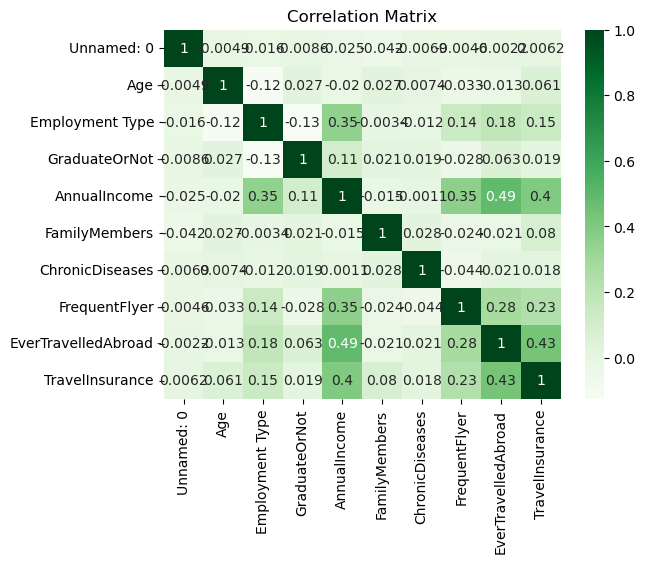

In [46]:
corr = Travel_df.corr()
sns.heatmap(corr, annot=True, cmap='Greens')
plt.title('Correlation Matrix')
plt.show()

In [50]:
import shap
explainer = shap.TreeExplainer(dt)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1],X_test)

ModuleNotFoundError: No module named 'shap'

In [48]:
from sklearn.model_selection import train_test_split
X = Travel_df.drop(['TravelInsurance'],axis=1)
y=Travel_df['TravelInsurance']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)

    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))

In [18]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
eval_classification(dtc)

Accuracy (Test Set): 0.72
Precision (Test Set): 0.64
Recall (Test Set): 0.59
F1-Score (Test Set): 0.61


In [19]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=6)
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)
eval_classification(rfc)

Accuracy (Test Set): 0.84
Precision (Test Set): 0.96
Recall (Test Set): 0.59
F1-Score (Test Set): 0.73


In [20]:
#KnnClassifier
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
knc.fit(X_train, y_train)
y_pred = knc.predict(X_test)
eval_classification(knc)

Accuracy (Test Set): 0.75
Precision (Test Set): 0.75
Recall (Test Set): 0.49
F1-Score (Test Set): 0.59


In [21]:
#GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)
eval_classification(gbc)

Accuracy (Test Set): 0.83
Precision (Test Set): 0.93
Recall (Test Set): 0.58
F1-Score (Test Set): 0.71


In [22]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
eval_classification(gnb)

Accuracy (Test Set): 0.76
Precision (Test Set): 0.79
Recall (Test Set): 0.50
F1-Score (Test Set): 0.61


In [23]:
 print(rfc.predict([[40,1,0,200000,5,1,0,1,0]]))

[0]


D:\Mini\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [24]:
eval_classification(gbc)

Accuracy (Test Set): 0.83
Precision (Test Set): 0.93
Recall (Test Set): 0.58
F1-Score (Test Set): 0.71


In [25]:
eval_classification(rfc)

Accuracy (Test Set): 0.84
Precision (Test Set): 0.96
Recall (Test Set): 0.59
F1-Score (Test Set): 0.73


In [26]:
eval_classification(dtc)

Accuracy (Test Set): 0.72
Precision (Test Set): 0.64
Recall (Test Set): 0.59
F1-Score (Test Set): 0.61


In [27]:
eval_classification(knc)

Accuracy (Test Set): 0.75
Precision (Test Set): 0.75
Recall (Test Set): 0.49
F1-Score (Test Set): 0.59


In [28]:
eval_classification(gnb)

Accuracy (Test Set): 0.76
Precision (Test Set): 0.79
Recall (Test Set): 0.50
F1-Score (Test Set): 0.61


In [29]:
pickle.dump(gbc,open('Travel.pkl','wb'))